<a href="https://colab.research.google.com/github/TheMShahid/00_PyTorch_Fundamentals_By_Muhammad_Shahid_Khan/blob/main/01_pytorch_workflow_video_aug_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
print('Second NoteBook start on Wed 6 Aug 2025 9: 36 AM')

Second NoteBook start on Wed 6 Aug 2025 9: 36 AM


# PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow.

Resources:
* Ground truth notebook - https://www.

In [86]:
what_were_covering = {
    1: 'data (prepare and load)',
    2: 'build a model or pick existing',
    3: 'fitting the model to the data (training)',
    4: 'making predictions and evaluating a model (inference)',
    5: 'saving and loading model',
    6: 'putting it all together'
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build a model or pick existing',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading model',
 6: 'putting it all together'}

In [87]:
import torch
from torch import nn # nn contains all of PyTorch building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

### 1. Data (preparing and loading)

Data can be almost anything... in machine learning

* Excel spread sheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or prodcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to find pattrens in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* parameters

In [88]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start=0
end=1
step=0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [89]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create training and test set with our data.

In [90]:
# Create train/test split or set
train_split = int(0.8 * len(X))
train_split

40

In [91]:
X, y, len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [92]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize"

In [93]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training and test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot the train data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

  # plot the test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')

  # Are there predictions?

  if predictions is not None:
    # Plot the predictions in red if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend
  plt.legend(prop={"size":14})

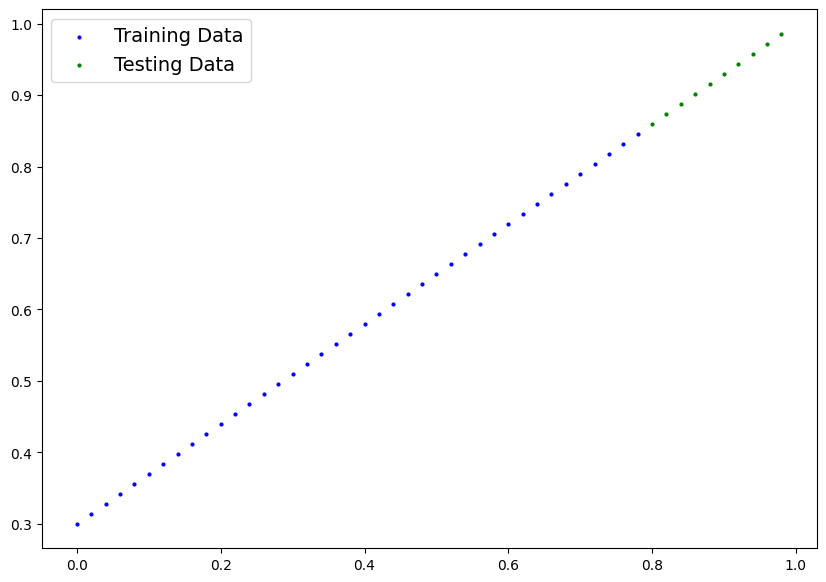

In [94]:
plot_predictions()

## 2. Build Model

Our first PyTorch model!

This is very exciting... let's do it!.

Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in Python, to do so you can use the following resource from Real Python - https://realpython.com

What our model does:
* Start with random numbers or values (weight & bais)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [95]:
# Create a linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # <- almost everthing in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=False,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data (training data or blue dots)
    return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings blocks for computational graphs (a neural network can be considered a computational graph.)
* torch.nn.Parameter - what parameters should our model try and learns, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward method ()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent.
* def forward () - All nn.Module subclasses require you to overwrite the forward method (), this method defines what happens in the forward computation.

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [96]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Checkout the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [97]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [98]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our mdel's predictive power, let's see how well it predicts `y_test` bansed on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method

In [99]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however torch.inference_mode() is preperred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [100]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

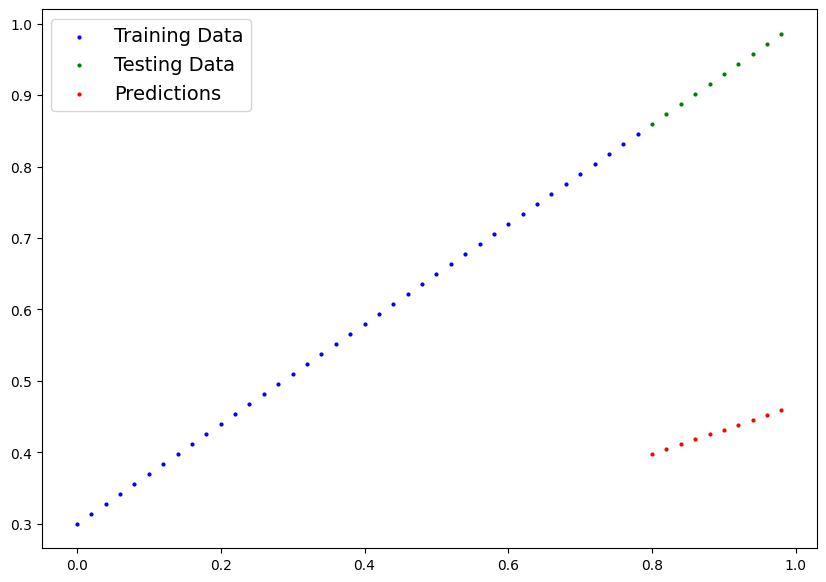

In [101]:
plot_predictions(predictions=y_preds)

In [102]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong yous model predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, so lower is better.
* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters (e.g wieght, bias in our case) to improve the loss function.

  * Inside the optimizer you'll often have to set two parameters
   * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
   * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step ( a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* Training loop
* Testing loop

In [103]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [104]:
# Check out our model's parameters (a parameter is a value that the model set itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Measure the MAE for two dimensions 0 and 1 explicitly, for boths `y_preds` and `y_test`

In [105]:
y_preds[0], y_test[0]

(tensor([0.3982], grad_fn=<SelectBackward0>), tensor([0.8600]))

In [106]:
y_preds[1], y_test[1]

(tensor([0.4049], grad_fn=<SelectBackward0>), tensor([0.8740]))

In [107]:
y_test[0] - y_preds[0]

tensor([0.4618], grad_fn=<SubBackward0>)

In [108]:
y_test[1] - y_preds[1]

tensor([0.4691], grad_fn=<SubBackward0>)

In [109]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = Learning rate = possibly the most important hyperparameters you can set

> **Q:** Which loss function and optimizer should I use?
>
> **A:** This will be a problem specific. But with experience, you'll get a idea of what works and what doesn't with your particular problem set.
>
> For example, for a regession problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.
>
> But for a classification problem like classifying whether a photo is of a laptop or a mobile, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loos)


### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**).
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [110]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [111]:
torch.manual_seed(42)

# An epoch is one loop trough the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
epochs_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that requires gradients.

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f'Loss : {loss}')

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Optimizer step (Perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we've to zero them above in step 3 for the next iteration of the loop.

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluations/testing (dropout / batch norm, )
  with torch.inference_mode(): # turns off gradient tracking & a couple of more things behind the scenes
  # with torhc.no_grad(): you may also see torch.no_grad() in older PyTorch code.
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epochs_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [112]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [113]:
# epochs_count, loss_values, test_loss_values

In [114]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

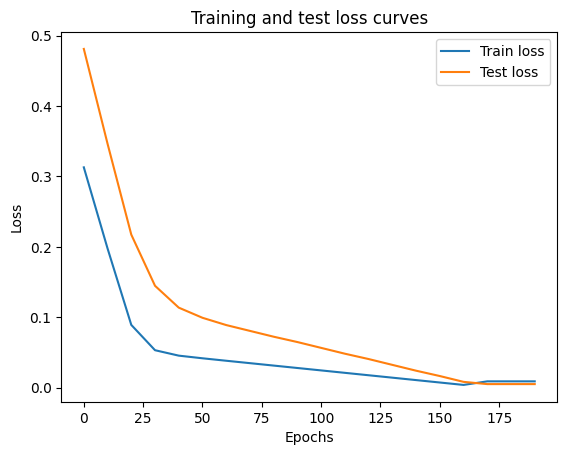

In [115]:
# Plot the loss curves
plt.plot(epochs_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epochs_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [116]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

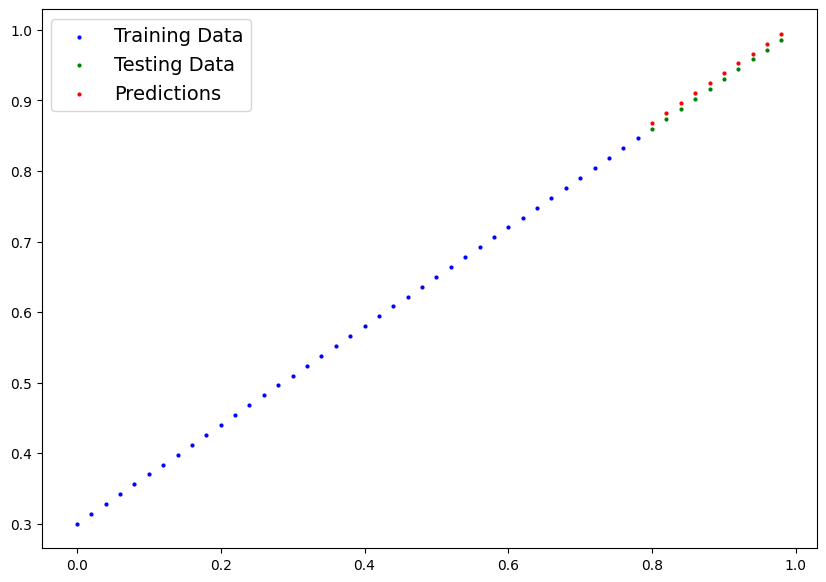

In [117]:
plot_predictions(predictions=y_preds_new)



```
# This is formatted as code
```

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format.
2. `torch.load()` allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [118]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [119]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a models directory/folder
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = '01_pytorch_workflow_video_aug_2025_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# MODEL_SAVE_PATH

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_video_aug_2025_model_0.pth


In [120]:
!ls -l models/

total 8
-rw-r--r-- 1 root root 1834 Aug 13 11:29 01_pytorch_workflow_video_aug_2025_model_0.pth
-rw-r--r-- 1 root root 1834 Aug 13 11:17 01_pytorch_workflow_video_aug_2025_model_1.pth


## Loading a PyTorch model

> Add blockquote



Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [121]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [122]:
# To load in a saved state_dict we've to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [123]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [124]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

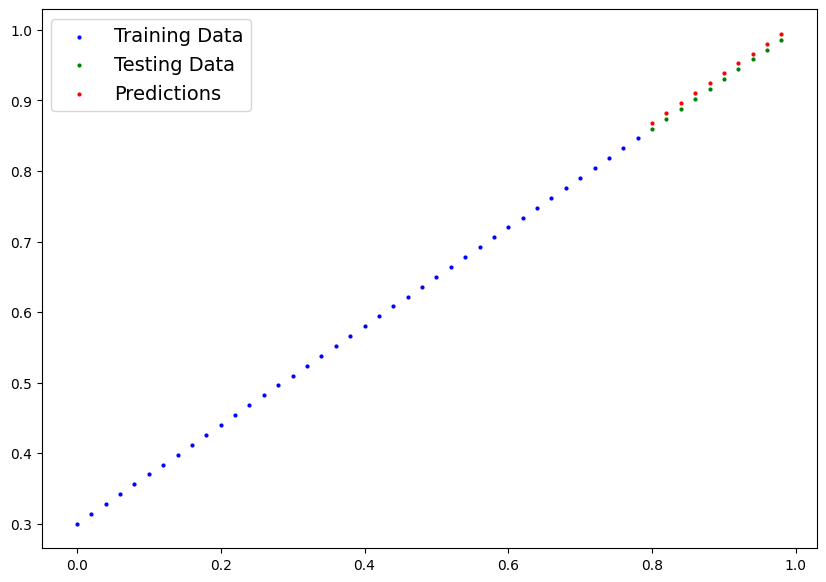

In [125]:
plot_predictions(predictions=loaded_model_preds)

In [126]:
# compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [127]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [128]:
# Make some model preds Note: this is only for practice purpose
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [129]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place

In [130]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

Create device agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing)

if no GPU is available, the code will default to using the CPU.

In [131]:
# Setuip device agnostic code
device = 'cuda' if torch.cuda.is_available else 'cpu'
print(f'Using device: {device}')

Using device: cuda


In [132]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### 6.1 Data

In [133]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X (features or matrix, inputs) and y (labels) Note: here we've created our data and turned the data to tensors with torch.arange
X_features = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y_labels = weight * X_features + bias

In [134]:
X_features[:10], y_labels[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [135]:
X_features # Without unsqueeze

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [136]:
X_features.unsqueeze(dim=1) # With unsqueeze dim 1

tensor([[[0.0000]],

        [[0.0200]],

        [[0.0400]],

        [[0.0600]],

        [[0.0800]],

        [[0.1000]],

        [[0.1200]],

        [[0.1400]],

        [[0.1600]],

        [[0.1800]],

        [[0.2000]],

        [[0.2200]],

        [[0.2400]],

        [[0.2600]],

        [[0.2800]],

        [[0.3000]],

        [[0.3200]],

        [[0.3400]],

        [[0.3600]],

        [[0.3800]],

        [[0.4000]],

        [[0.4200]],

        [[0.4400]],

        [[0.4600]],

        [[0.4800]],

        [[0.5000]],

        [[0.5200]],

        [[0.5400]],

        [[0.5600]],

        [[0.5800]],

        [[0.6000]],

        [[0.6200]],

        [[0.6400]],

        [[0.6600]],

        [[0.6800]],

        [[0.7000]],

        [[0.7200]],

        [[0.7400]],

        [[0.7600]],

        [[0.7800]],

        [[0.8000]],

        [[0.8200]],

        [[0.8400]],

        [[0.8600]],

        [[0.8800]],

        [[0.9000]],

        [[0.9200]],

        [[0.9

In [137]:
len(X_features), len(y_labels)

(50, 50)

In [138]:
# Split data
train_split = int(0.8 * len(X_features)) # here 0.8 means 80% data for training and 20% will be for testing
train_split

40

In [139]:
X_train_features, y_train_labels = X_features[:train_split], y_labels[:train_split]
X_test_features, y_test_labels = X_features[train_split:], y_labels[train_split:]
len(X_train_features), len(y_train_labels), len(X_test_features), len(y_test_labels)

(40, 40, 10, 10)

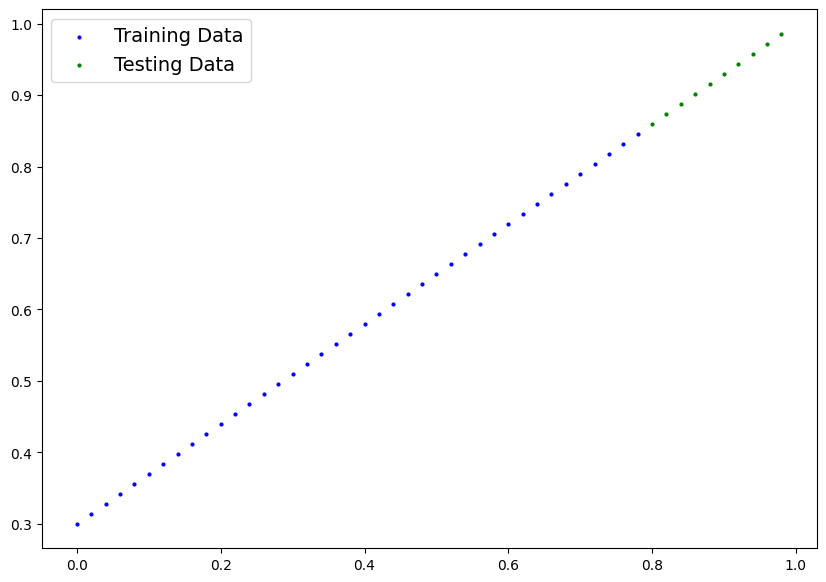

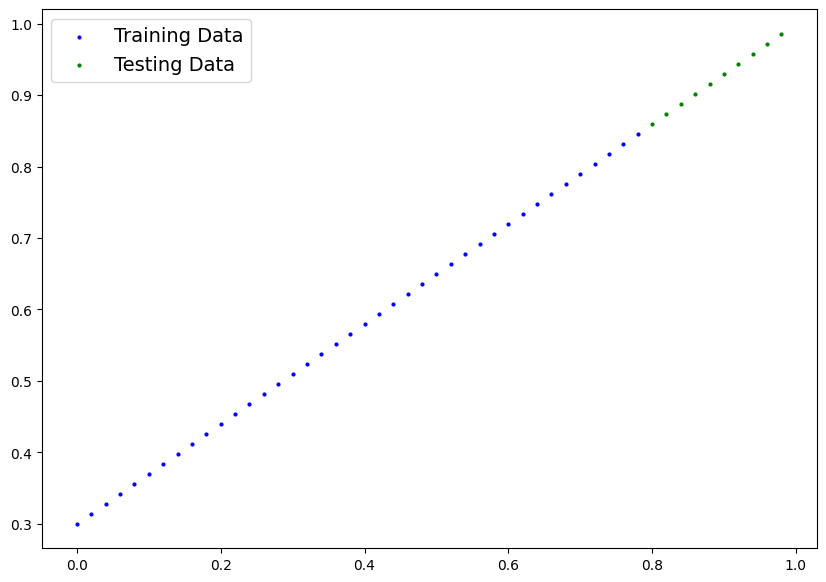

In [140]:
# Plot the data
# Note: if you don't have the plot_predictions() function, this will error.
plot_predictions(X_train_features, y_train_labels, X_test_features, y_test_labels)
plot_predictions(train_data=X_train_features, train_labels=y_train_labels, test_data=X_test_features, test_labels=y_test_labels)

## 6.2 Building a PyTorch linear model

In [141]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

  # 1. Initialize the model parameters. Explicitly means by yourself
  # self.weights = nn.Parameter(torch.randn(1,
  #                                         requires_grad=True,
  #                                         dtype=torch.float))

  # self.bias = nn.Parameter(torch.randn(1,
  #                                      requires_grad=True,
  #                                      dtype=torch.float))

  # 2. Initialize the model parameters. Implicitly means dynamically or automatically

  # Use nn.Linear() for creating the model parameters / also called linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

# Now create the instance of the class or model
model_1 = LinearRegressionModelV2()

model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [142]:
X_train_features[:5], y_train_labels[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

uncomment the following code if you have a GPU access

In [143]:
# Check the model current device
# next(model_1.parameters()).to(device)

In [144]:
# Set the model to use the target device
# model_1.to(device)
# next(model_1.parameters()).to(device)

In [145]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [146]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [147]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Track the values

# Put data on target device if you have CUDA access (device agnostic code for data)
# X_train_features = X_train_features.to(device)
# y_train_labels = y_train_labels.to(device)
# X_test_features = X_test_features.to(device)
# y_test_labels = y_test_labels.to(device)

### Training
for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred_model_1 = model_1(X_train_features)

  # 2. Calculate the loss
  loss = loss_fn(y_pred_model_1, y_train_labels)

  # 3. Zero the optimzier
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred_model_1 = model_1(X_test_features)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred_model_1, y_test_labels)

  # Print out what's happening

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [148]:
X_train_features.device, y_train_labels.device

(device(type='cpu'), device(type='cpu'))

In [149]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [150]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [151]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on test data
with torch.inference_mode():
  y_preds = model_1(X_test_features)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

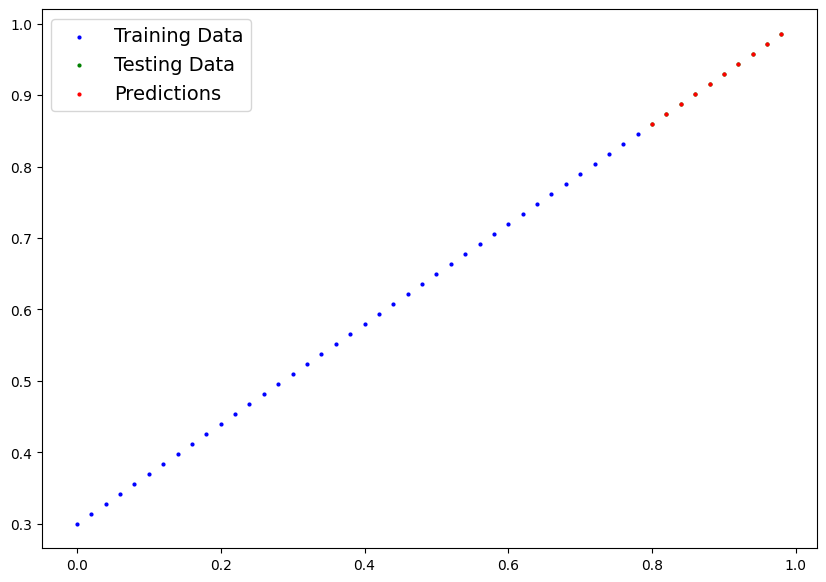

In [152]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

In [153]:
### 6.5 Saving & loading a trained model
from pathlib import Path

# 1. Create models directory/folder
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# 2. Create models save path
MODEL_NAME = '01_pytorch_workflow_video_aug_2025_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_video_aug_2025_model_1.pth


In [157]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
# loaded_model_1.to(device)

loaded_model_1

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [160]:
# next(loaded_model_1.parameters()).to(device)

In [161]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [162]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [163]:
# Evaluate loaded_model_1
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test_features)

loaded_model_1_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

In [166]:
loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

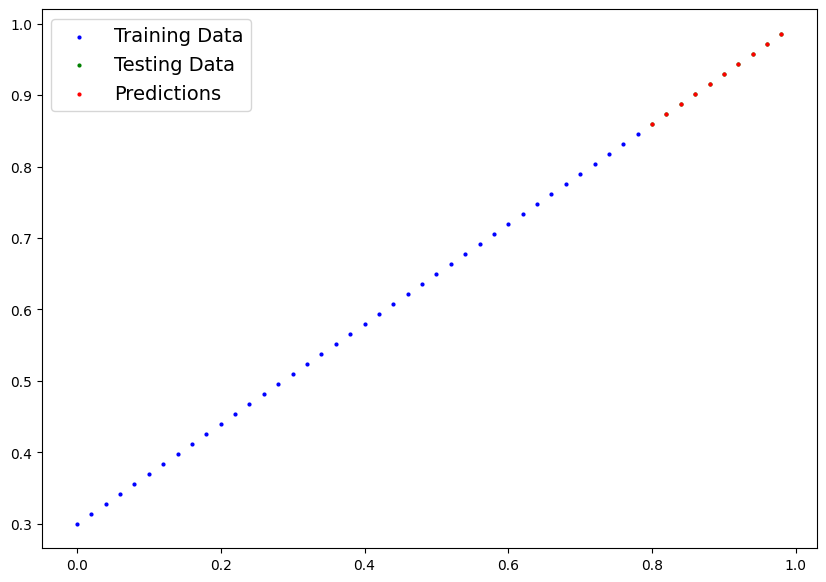

In [165]:
plot_predictions(predictions=loaded_model_1_preds)